# Beispiel MLFlow Model Registry

Alle geloggten Modelle stehen in der MLFlow Registry zur Verfügung.

```
mlflow.pytorch.log_model(
        pytorch_model=model,
        artifact_path='crack-tip-detection',
        registered_model_name='crack-tip-detection-production',
    )
```

Von einem Modell kann es mehrere Versionen geben.

![versions](img/model_registry.png)

## Beispiel: Anwenden eines Modells aus der MLFlow Model Registry

Verbinden mit dem MLFlow Tracking Server

In [12]:
import mlflow
mlflow.set_tracking_uri('http://localhost:5000')

In [18]:
import sys
import example.data_loader as dl
import example.crack_tip_plotting as plt

**Laden des Modells crack-tip-detection-production Version 1**

In [46]:
model_name = 'crack-tip-detection-production'
model_version = 1

model = mlflow.pytorch.load_model(f'models:/{model_name}/{model_version}')

**Anwenden des Modells auf ein DIC Bild eines Aluminiumteils**

*Experiment S_160_4.7 Teil 22 linke Seite*

In [52]:
sample, background, size, _ = dl.load_instance('S_160_4.7', 22, 'left')

Data will be imported for left side of the specimen...
- S_160_4.7_AllDataPoints_22.txt. 1/1 imported.

Data will be interpolated on an array...
- S_160_4.7_AllDataPoints_22.txt_left. 1/1 interpolated.



In [53]:
out = model(sample)

**Visuelle Darstellung von Ermüdungsrissen**

Data will be plotted...


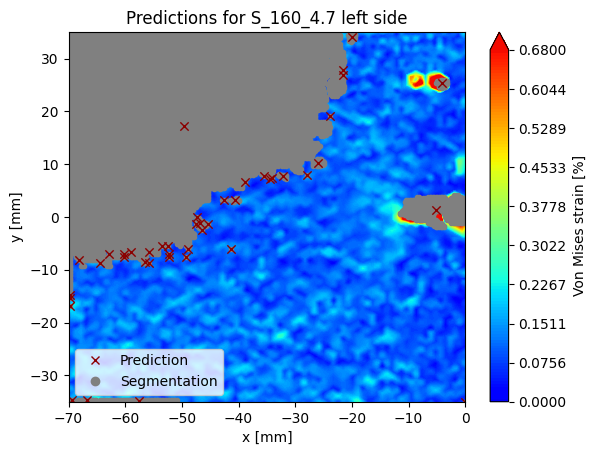

In [54]:
plt.plot_predictions(out[0], background, size, f'Predictions for S_160_4.7 left side')